# 1. Text summarization with SpaCy (extractive approach)
This method takes the input from the user and then choose the most sourceful sentences based on the number of important words contained in each sentence. Which are the important words? These are simply nouns, verbs and adjectives, so this code check every token in the sentence using SpaCy tools and return the amount of important words for every sentence. Top X sentences (with the biggest number of key words) create our summary. It relies on sentences from the original text, as this method uses the extractive approach.

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

import spacy
from nltk.tokenize import sent_tokenize
from collections import Counter
import pandas as pd
import nltk

nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
def summarize_text():
    text = input("Please enter the text you want to summarize:\n")

    sentences = sent_tokenize(text)

    preprocessed_sentences = []
    for sentence in sentences:
        doc = nlp(sentence)
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ in ['NOUN', 'VERB', 'ADJ']]
        preprocessed_sentences.append(' '.join(tokens))

    sentence_scores = [len(sentence.split()) for sentence in preprocessed_sentences]

    sorted_sentences = [sentence for score, sentence in sorted(zip(sentence_scores, sentences), reverse=True)]

    return ' '.join(sorted_sentences[:3])
    print(sorted_sentences)

summary = summarize_text()
print("\nSummary:")
print(summary)

Please enter the text you want to summarize:
Copenhagen is a city that you visit for the vibe rather than for the sights. I found the most rewarding parts of Copenhagen to be wandering through the city and looking at the buildings, stopping for coffee at the coffee trucks along the harbor, and window shopping at the design stores.   Below is a list of the more unusual places I went to in Copenhagen on my latest trip. Many of these are cool corners that I found, not main tourist destinations - so this list isn’t in any way meant as a full itinerary.    This is not an unusual destination - this is Nyhavn, the tourist center of Copenhagen. But it photographs amazingly well, especially on days when the water in the canal is still.  Skiing at Copenhill  Have you ever wanted to go skiing on artificial turf on top of a power plant? Well, you’re in luck. Copenhill is a power plant that has been turned into a ski resort. No, seriously.  The roof of the ski resort is covered in a plastic grass s

# 2. Text Summarization with Transformers (abstarctive approach)
This method takes the input from the user and uses a pre-trained Transformer model to generate a summary. Unlike extracting specific sentences, Transformers understand the entire context of the input text by leveraging an advanced mechanism called self-attention. This allows the model to identify the most relevant parts of the text while considering the relationships between words, phrases, and ideas throughout the passage. The summary is generated as a new piece of text, rephrased and condensed while retaining the original meaning. Key parameters, such as the desired summary length, can be adjusted to suit different needs. This approach, which is abstractive, produces fluent and coherent summaries suitable for a wide range of content.

In [ ]:
import transformers
from transformers import pipeline

In [ ]:
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", revision="a4f8f3e")

text = input("Enter the text you want to summarize: ")

summary = summarizer(text, max_length=100, min_length=60, do_sample=False)

print("\nSummary:")
print(summary[0]['summary_text'])

Device set to use cpu


Enter the text you want to summarize: Copenhagen is a city that you visit for the vibe rather than for the sights. I found the most rewarding parts of Copenhagen to be wandering through the city and looking at the buildings, stopping for coffee at the coffee trucks along the harbor, and window shopping at the design stores.   Below is a list of the more unusual places I went to in Copenhagen on my latest trip. Many of these are cool corners that I found, not main tourist destinations - so this list isn’t in any way meant as a full itinerary.    This is not an unusual destination - this is Nyhavn, the tourist center of Copenhagen. But it photographs amazingly well, especially on days when the water in the canal is still.  Skiing at Copenhill  Have you ever wanted to go skiing on artificial turf on top of a power plant? Well, you’re in luck. Copenhill is a power plant that has been turned into a ski resort. No, seriously.  The roof of the ski resort is covered in a plastic grass substitu

The abstract approach is a bit different from the extractive approach. I would call the summary created using the extractive method more "inflexible" because it consists of original sentences from the input text. However, these sentences are taken out of the whole and although they describe the same phenomenon, when combined they sound a bit unnatural. The abstract approach, on the other hand, creates a summary from scratch, so a new text based on the original. Here, this narrative is more "natural", although the whole summary does not sound perfect in my opinion, and the original text is not perfectly described.

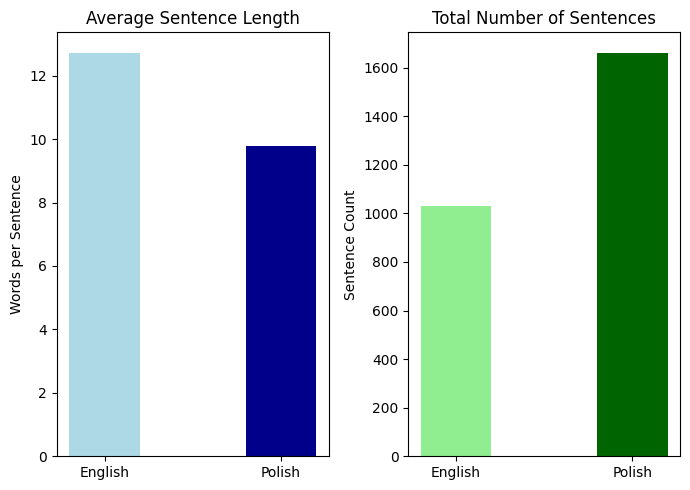

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
languages = ['English', 'Polish']
avg_sentence_length = [12.73, 9.78]
num_sentences = [1029, 1662]

# Bar width
bar_width = 0.4

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

# Plot number of sentences
axes[1].bar(languages, num_sentences, color=['lightgreen', 'darkgreen'], width=bar_width)
axes[1].set_title('Total Number of Sentences')
axes[1].set_ylabel('Sentence Count')

# Plot average sentence length
axes[0].bar(languages, avg_sentence_length, color=['lightblue', 'darkblue'], width=bar_width)
axes[0].set_title('Average Sentence Length')
axes[0].set_ylabel('Words per Sentence')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
